In [7]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb
import datetime as dt
import numpy as np

In [8]:
plt.rcParams["font.family"] = 'Malgun Gothic'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["axes.unicode_minus"] = False

In [9]:
df = read_excel("C:\\Users\\User\\Desktop\\궁둥박사\\BigdatamegaIT\\수업내용\\D_탐색적_데이터\\01_데이터_시각화/covid19.xlsx")
df

,서울시 기준일,서울 확진자,서울시 일일 확진,서울시 사망,전국 확진,전국 일일 확진,전국 사망
0,2023-05-31,6204277,5987.0,6492,31703511.0,24411.0,34784
1,2023-05-30,6198290,3326.0,6486,31679100.0,13529.0,34767
2,2023-05-29,6194964,1393.0,6485,31665571.0,6868.0,34760
3,2023-05-28,6194964,1393.0,6485,31665571.0,6868.0,34760
4,2023-05-27,6191196,4078.0,6485,31647238.0,17796.0,34784
...,...,...,...,...,...,...,...
1207,2020-02-09,10,0.0,0,27.0,0.0,0
1208,2020-02-08,10,0.0,0,24.0,0.0,0
1209,2020-02-07,10,0.0,0,24.0,0.0,0
1210,2020-02-06,11,0.0,0,24.0,0.0,0


In [16]:
# 검색 날짜 변수 생성
# 사용자로부터 날짜 입력 받기
input_date = input("검색일을 입력하세요(yyyymmdd)")
print(type(input_date))
input_date

<class 'str'>


'20230525'

In [17]:
# 입력받은 날짜를 datetime 객체로 생성
start_date = dt.datetime.strptime(input_date, '%Y%m%d')
print(type(start_date))
start_date

<class 'datetime.datetime'>


datetime.datetime(2023, 5, 25, 0, 0)

In [18]:
# 검색 종료일 구하기
delta = dt.timedelta(days=6)
end_date = start_date + delta
print(type(end_date))
end_date

<class 'datetime.datetime'>


datetime.datetime(2023, 5, 31, 0, 0)

In [19]:
# 검색 기간에 따른 데이터 추출
query_df = df.query('`서울시 기준일` >= @ start_date and `서울시 기준일` <= @end_date')
target_df = query_df.sort_values('서울시 기준일')
target_df

,서울시 기준일,서울 확진자,서울시 일일 확진,서울시 사망,전국 확진,전국 일일 확진,전국 사망
6,2023-05-25,6183062,4435.0,6481,31611509.0,19080.0,34736
5,2023-05-26,6187279,4217.0,6483,31629442.0,17933.0,34781
4,2023-05-27,6191196,4078.0,6485,31647238.0,17796.0,34784
3,2023-05-28,6194964,1393.0,6485,31665571.0,6868.0,34760
2,2023-05-29,6194964,1393.0,6485,31665571.0,6868.0,34760
1,2023-05-30,6198290,3326.0,6486,31679100.0,13529.0,34767
0,2023-05-31,6204277,5987.0,6492,31703511.0,24411.0,34784


In [20]:
# X축 레이블 만들기
# X축 좌표
x = list(range(0, len(target_df['서울시 기준일'])))
x

[0, 1, 2, 3, 4, 5, 6]

In [21]:
# X축 텍스트
xticks = []

for i in target_df['서울시 기준일']:
    xticks.append(i.strftime('%m.%d'))

xticks

['05.25', '05.26', '05.27', '05.28', '05.29', '05.30', '05.31']

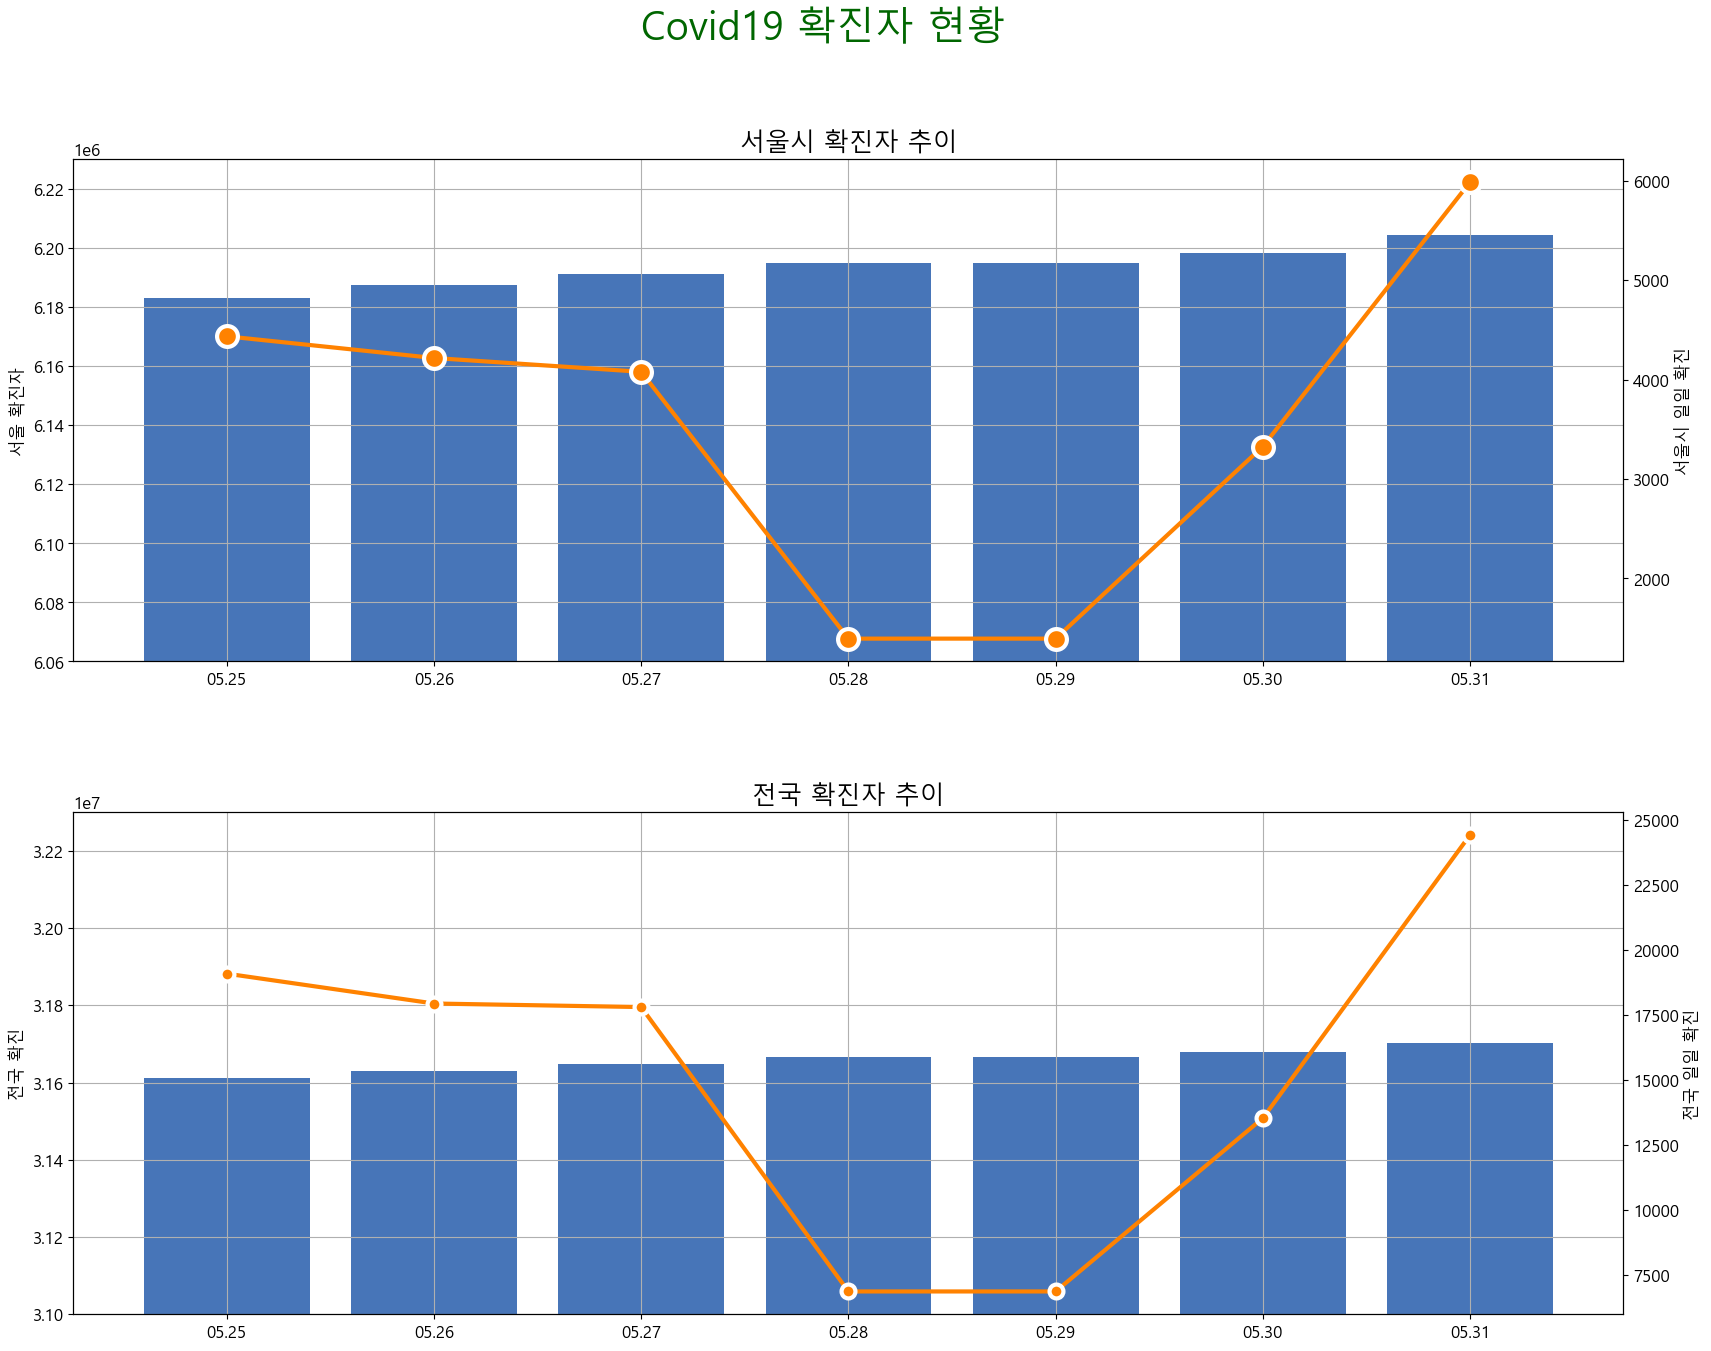

In [27]:
# 그래프 그리기
# 2랭 1열의 서프블롯을 만들고 각각의 그래프 영역에 대한 twinx를 생성

# 2행1열 서브플롯
fig, (ax1_left, ax2_left) = plt.subplots(2, 1, figsize=(20, 15))

# 각 서브플롯별로 twinx 생성
ax1_right = ax1_left.twinx()
ax2_right = ax2_left.twinx() 

# 전체 제목
fig.suptitle('Covid19 확진자 현황', fontsize=28, color='#006600')

# 각 그래프 간의 세로(hspace) 간격 지정
fig.subplots_adjust(hspace=0.3)

# 첫 번째 왼쪽 그래프
sb.barplot(data=target_df, x=x, y='서울 확진자', color="#3471CB", ax=ax1_left)
ax1_left.grid()
ax1_left.set_title('서울시 확진자 추이', fontsize=18)
ax1_left.set_ylim(6060000, 6230000)
ax1_left.set_xticks(x)
ax1_left.set_xticklabels(xticks, fontsize=12, rotation=0)

# 첫 번째 오른쪽 그래프
sb.lineplot(data=target_df, x=x, y='서울시 일일 확진', ax=ax1_right,
            color="#FF8200", linestyle='-', linewidth=3,
            marker="o", markersize=15, markerfacecolor="#FF8200",
            markeredgecolor="#ffffff", markeredgewidth=3)

# 두 번째 왼쪽 그래프
sb.barplot(data=target_df, x=x, y='전국 확진', color="#3471CB", ax=ax2_left)
ax2_left.grid()
ax2_left.set_title('전국 확진자 추이', fontsize=18)
ax2_left.set_ylim(31000000, 32300000)
ax2_left.set_xticks(x)
ax2_left.set_xticklabels(xticks, fontsize=12, rotation=0)

# 두 번째 오른쪽 그래프
sb.lineplot(data=target_df, x=x, y='전국 일일 확진', ax=ax2_right,
            color="#FF8200", linestyle='-', linewidth=3,
            marker="o", markersize=10, markerfacecolor="#FF8200",
            markeredgecolor="#ffffff", markeredgewidth=3)

plt.show()
plt.close()